<a href="https://colab.research.google.com/github/halonoer/Learn_Collab_Google/blob/main/TugasModul3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ## **Upload Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Eps2-Data-train.csv to Eps2-Data-train.csv


**Ini mengimpor pustaka pandas**

In [ ]:
import pandas as pd
import io
data1 = pd.read_csv(io.BytesIO(uploaded['Eps2-Data-train.csv']))

> ## **Remove Data**

In [ ]:
import os

# Menghapus file
os.remove('Eps2-Data-train (5).csv')
print("File telah dihapus")


File telah dihapus


> ## Penanganan Missing Value

Cek atribut yang memiliki missing value dan berapa jumlah missing valuenya.

In [ ]:
print(data1.isnull().sum())
print(data1.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


> ##  Hapus Atribut

cara penghapusan satu atribut.  (Cabin)

In [ ]:
data1.drop(['Cabin'], axis=1, inplace=True)

Tes lagi

In [ ]:
print(data1.isnull().sum())
print(data1.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
(891, 11)


menghapus keseluruhan atribut yang memiliki missing value

In [ ]:
data1.dropna(axis=1, inplace=True)

Cek apakah atribut yang mengandung missing value seluruhnya terhapus?

In [ ]:
print(data1.isnull().sum())
print(data1.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64
(891, 9)


buat data baru (2)

In [ ]:
import pandas as pd
import io
data2 = pd.read_csv(io.BytesIO(uploaded['Eps2-Data-train.csv']))

cek data baru

In [ ]:
print(data2.isnull().sum())
print(data2.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


Menghapus baris dengan nilai kosong di kolom "Embarked"

In [ ]:
data2.dropna(subset=["Embarked"], inplace=True)

Memeriksa kembali jumlah nilai null setelah penghapusan

In [ ]:
print(data2.isnull().sum())
print(data2.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
(889, 12)


Data Embarked menjadi 0

menghapus keseluruhan instance yang memiliki miminal 1 missing value

In [ ]:
data2.dropna(inplace=True)

Tugas 2: Cek apakah baris yang mengandung missing value seluruhnya terhapus?

In [ ]:
print(data2.isnull().sum())
print(data2.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
(183, 12)


Iya, semua data terhapus yang mengandung Missing Value

> ## Metode Imputation

Buat data baru (3)

In [ ]:
import pandas as pd
import io
data3 = pd.read_csv(io.BytesIO(uploaded['Eps2-Data-train.csv']))

Cek data

In [ ]:
print(data3.isnull().sum())
print(data3.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


Seluruh data yang missing, diisi dengan nilai rata-rata atau mean.

In [ ]:
# Mengisi nilai NaN pada kolom numerik dengan mean
numeric_columns = data3.select_dtypes(include=['float64', 'int64']).columns
data3[numeric_columns] = data3[numeric_columns].fillna(data3[numeric_columns].mean())


In [ ]:
print(data3.isnull().sum())
print(data3.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


Jika dilihat pada hasil tersebut, atribut yang berhasil terisi (hilang missing valuenya) dengan
nilai rata-rata hanyalah atribut ‘Age’.

**Tugas 3:**
- Jelaskan mengapa atribut ‘Cabin’ dan ‘Embarked’ tidak terisi?
- Cari cara untuk mengisi atribut ‘Cabin’ dan ‘Embarked’ dan aplikasikan untuk mengisi
missing value pada kedua data tersebut (pilih satu teknik saja).


Jelaskan mengapa atribut ‘Cabin’ dan ‘Embarked’ tidak terisi?

untuk atribut tersebut yang merupakan data teks atau kategorical, sehingga tidak ada nilai rata-rata yang bisa dihitung

Cari cara untuk mengisi atribut ‘Cabin’ dan ‘Embarked’ dan aplikasikan untuk mengisi missing value pada kedua data tersebut (pilih satu teknik saja).


cara mengisi Missing Value
- Mengisi dengan modus (most frequent value): Teknik ini mengisi nilai yang hilang dengan nilai yang paling sering muncul dalam kolom tersebut.
- Mengisi dengan nilai tertentu (misalnya, string "Unknown" untuk Cabin).
- Mengisi dengan prediksi menggunakan model machine learning. (Lebih kompleks)

In [ ]:
# Mengisi missing value pada kolom 'Embarked' dengan modus (nilai yang paling sering muncul)
most_frequent_embarked = data3['Embarked'].mode()[0]
data3['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Mengisi missing value pada kolom 'Cabin' dengan string 'Unknown'
data3['Cabin'].fillna('Unknown', inplace=True)

# Mengecek kembali apakah masih ada missing value
print(data3.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


> ## Membuat Atribut Baru

Buat Data(4)

In [ ]:
import pandas as pd
import io
data4 = pd.read_csv(io.BytesIO(uploaded['Eps2-Data-train.csv']))

tes lagi

In [ ]:
print(data4.isnull().sum())
print(data4.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [ ]:
# Menampilkan data dalam bentuk tabel
print(data4)

# Atau menampilkan 5 data pertama
print(data4.head())

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Cek isi data, apakah sesuai dengan yang diharapkan

In [ ]:
# Menampilkan 5 baris pertama dari tabel
data4.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


tidak ada atribut yang menjelaskan apakh penumpang staf/officer

**Tugas 4**:
- Cek pada atribut nama penumpang terdapat title apa saja?
- Cek apakah pada atribut nama penumpang terdapat data yang kosong/null?

### - Cek pada atribut nama penumpang terdapat title apa saja?

cek data penumpang

In [ ]:
# Ekstraksi title dari kolom 'Name'
data4['Title'] = data4['Name'].map(lambda name: name.split(",")[1].split(".")[0].strip())

# Menampilkan title unik yang ada di kolom 'Title'
unique_titles = data4['Title'].unique()

# Menampilkan daftar title unik
print(f"Title yang terdapat pada penumpang: {unique_titles}")


Title yang terdapat pada penumpang: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


### - Cek apakah pada atribut nama penumpang terdapat data yang kosong/null?


Age, Cabin, Embarked

PassengerId

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['PassengerId'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom PassengerId: {missing_name_data}')

Jumlah data kosong pada kolom PassengerId: 0


Name

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['Name'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom Name: {missing_name_data}')


Jumlah data kosong pada kolom Name: 0


Survived

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['Survived'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom Survived: {missing_name_data}')

Jumlah data kosong pada kolom Survived: 0


Pclass

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['Pclass'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom Pclass: {missing_name_data}')

Jumlah data kosong pada kolom Pclass: 0


Sex

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['Sex'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom Sex: {missing_name_data}')

Jumlah data kosong pada kolom Sex: 0


Age

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['Age'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom Age: {missing_name_data}')

Jumlah data kosong pada kolom Age: 177


SibSp

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['SibSp'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom SibSp: {missing_name_data}')

Jumlah data kosong pada kolom SibSp: 0


Parch

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['Parch'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom Parch: {missing_name_data}')

Jumlah data kosong pada kolom Parch: 0


Ticket

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['Ticket'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom Ticket: {missing_name_data}')

Jumlah data kosong pada kolom Ticket: 0


Fare

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['Fare'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom Fare: {missing_name_data}')

Jumlah data kosong pada kolom Fare: 0


Cabin

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['Cabin'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom Cabin: {missing_name_data}')

Jumlah data kosong pada kolom Cabin: 687


Embarked

Setelah diketahui daftar titlenya apa saja, maka kita dapat mengekstrak data title penumpang
ini dan menyimpannya dalam atribut yang berbeda.
Pecah atribut nama sesuai dengan kondisi isi dari atribut tersebut dan masukkan data hasil
pecahan tersebut ke dalam kolom baru ‘Title’ yang terletak di posisi ke 12 alias setelah kolom
terakhir.

In [ ]:
# Cek apakah ada data kosong/null pada kolom 'Name'
missing_name_data = data4['Embarked'].isnull().sum()

# Tampilkan jumlah data kosong pada kolom 'Name'
print(f'Jumlah data kosong pada kolom Embarked: {missing_name_data}')

Jumlah data kosong pada kolom Embarked: 2


### Kemudian lakukan transformasi title penumpang ke dalam kelompok title yang sudah ditentukan.

Buat Title_Map

In [ ]:
title_map={"Capt": "Officer",
           "Col": "Officer",
           "Major" : "Officer",
           "Johnkheer": "Royalty",
           "Don": "Royalty",
           "Sir":"Royalty",
           "Dr":"Royalty",
           "Rev": "Officer",
           "The Countess":"Royalty",
           "Dona": "Royalty",
           "Mme": "Mrs",
           "Mile": "Miss",
           "Ms": "Mrs",
           "Mr": "Mr",
           "Mrs": "Mrs",
           "Miss": "Miss",
           "Master": "Master",
           "Lady": "Royalty"}

data4['Title'] = data4['Title'].map(title_map)

Cek data apakah berubah?

In [ ]:
data4.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


Cek jumlah dari masing-masing kelompok title.

**Tugas 5**: Berapa orang yang termasuk officer, royal, dan lainnya?

In [ ]:
# Memetakan title ke dalam kelompok yang telah ditentukan (Officer, Royalty, dll.)
data4['Title'] = data4['Title'].map(title_map)

# Menghitung jumlah orang dari masing-masing kelompok title
title_counts = data4['Title'].value_counts()

# Menampilkan jumlah orang dari masing-masing kelompok title
print(title_counts)

# Menampilkan jumlah orang berdasarkan kategori Officer, Royalty, dan lainnya
officers = title_counts.get("Officer", 0)
royalty = title_counts.get("Royalty", 0)
other = title_counts.sum() - officers - royalty

print(f"Jumlah Officer: {officers}")
print(f"Jumlah Royalty: {royalty}")
print(f"Jumlah Lainnya: {other}")


Title
Mr        517
Miss      182
Mrs       127
Master     40
Name: count, dtype: int64
Jumlah Officer: 0
Jumlah Royalty: 0
Jumlah Lainnya: 866


tidak ada atribut penumpang merupaka dewasa atau anak-anak
cek apakah pada atribut umur ada yang kosong/null?

In [ ]:
data4["Age"].isnull().sum()

177

Karena pada atribut umur banyak yang kosong, maka untuk kelompok umur ini sebaiknya kita
ambil dari title. Karena kita dapat menentukan secara umum kelompok umur seseorang
dilihat titlenya.
Buat fungsi untuk mengelompokkan kelompok umur dengan menggunakan aturan kondisi.

In [ ]:
def passenger_type(row):
  if row['Age'] < 2 :
    return 'Infant'
  elif row['Age'] >= 2 and row['Age'] < 12 :
    return 'Child'
  elif row['Age'] >= 12 and row['Age'] < 18 :
    return 'Youth'
  elif row['Age'] >= 18 and row['Age'] < 60 :
    return 'Adult'
  elif row['Age'] >= 60 :
    return 'Senior'
  elif row['Title'] == 'Master':
    return 'Child'
  elif row['Title'] == 'Miss':
    return 'Child'
  elif row['Title'] == 'Mr'or row['Title'] == 'Mrs':
    return 'Adult'
  else:
    return 'Unknown'

data4['Passenger_type'] = data4.apply(lambda row: passenger_type(row), axis=1)

data4.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Passenger_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Adult


> **Penjelasan Kode:**

1. **Memetakan title**: Menggunakan map(title_map) untuk mengubah title menjadi kategori seperti Officer, Royalty, Mr, Mrs, Miss, dll.
2. **Menghitung jumlah kemunculan tiap kategori**: Menggunakan value_counts() untuk menghitung berapa kali setiap title muncul.
3. **Mengambil jumlah Officer dan Royalty**: Dengan get("Officer", 0) dan get("Royalty", 0), kita memastikan jumlahnya, serta untuk kategori lainnya (seperti Mr, Mrs, dll.), kita hitung dengan mengurangi jumlah Officer dan Royalty dari total keseluruhan.
> **Output:**
1. **Jumlah Officer**: Total penumpang dengan title yang dipetakan sebagai Officer.
2. **Jumlah Royalty**: Total penumpang dengan title yang dipetakan sebagai Royalty.
3. **Jumlah Lainnya**: Total penumpang yang termasuk ke dalam title selain Officer dan Royalty.


Cek jumlah dari masing-masing kelompok umur.

**Tugas 6**: Berapa orang yang senior, dewasa, dan anak-anak?

In [ ]:
# Menghitung jumlah dari masing-masing kelompok umur
age_group_counts = data4['Passenger_type'].value_counts()

# Menampilkan jumlah orang dari masing-masing kelompok umur
print(age_group_counts)

# Mendapatkan jumlah Senior, Adult, dan Child
senior = age_group_counts.get('Senior', 0)
adult = age_group_counts.get('Adult', 0)
child = age_group_counts.get('Child', 0)

print(f"Jumlah Senior: {senior}")
print(f"Jumlah Adult: {adult}")
print(f"Jumlah Child: {child}")


Passenger_type
Adult      711
Child       94
Youth       45
Senior      26
Infant      14
Unknown      1
Name: count, dtype: int64
Jumlah Senior: 26
Jumlah Adult: 711
Jumlah Child: 94


> ## Transformasi Data

### Cara manual adalah dengan melakukan mapping atribut jenis kelamin.
Dengan laki-laki : 1dan perempuan : 0


In [ ]:
Sex_map={"male": 1, "female": 0}
data4['Sex'] = data4['Sex'].map(Sex_map)

cek data(4)

In [ ]:
data4.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Passenger_type
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,Mr,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,Youth


In [ ]:
def passenger_type(row):
  if row['Age'] < 2 :
    return 'Infant'
  elif row['Age'] >= 2 and row['Age'] < 12 :
    return 'Child'
  elif row['Age'] >= 12 and row['Age'] < 18 :
    return 'Youth'
  elif row['Age'] >= 18 and row['Age'] < 60 :
    return 'Adult'
  elif row['Age'] >= 60 :
    return 'Senior'
  elif row['Title'] == 'Master':
    return 'Child'
  elif row['Title'] == 'Miss':
    return 'Child'
  elif row['Title'] == 'Mr'or row['Title'] == 'Mrs':
    return 'Adult'
  else:
    return 'Unknown'

data4['Passenger_type'] = data4.apply(lambda row: passenger_type(row), axis=1)


data awal diatas

Coba lakukan mapping ini pada ‘PassengerType’
Dengan aturan mapping sebagai berikut:
- Unknown : 0
- Infant : 1
- Child : 2
- Youth : 3
- Adult : 4
- Senior : 5

### **Tugas 7**: Apakah terjadi perubahan isian data pada atribut ‘PassegerType’?

In [ ]:
# Menampilkan nilai unik yang ada di kolom Passenger_type sebelum mapping
print(data4['Passenger_type'].unique())

# Setelah mengetahui nilai apa yang tidak ada dalam dictionary, tambahkan ke passenger_type_map jika perlu


['Adult' 'Child' 'Youth' 'Senior' 'Infant' 'Unknown']


In [ ]:
# Mapping dari Passenger_type ke angka
passenger_type_map = {
    'Unknown': 0,
    'Infant': 1,
    'Child': 2,
    'Youth': 3,
    'Adult': 4,
    'Senior': 5
}

# Menerapkan mapping pada kolom Passenger_type
data4['Passenger_type'] = data4['Passenger_type'].map(passenger_type_map)

# Tampilkan 10 baris pertama untuk memverifikasi perubahan
print(data4[['Passenger_type']].head(10))




   Passenger_type
0               4
1               4
2               4
3               4
4               4
5               4
6               4
7               2
8               4
9               3


In [ ]:
data4.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Passenger_type
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,Mr,4
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,4
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,4
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,3


Cara manual ini sayangnya memiliki kelemahan yaitu jika isi data diluar dari yang didefinisikan
dalam mapping, maka data tersebut tidak dapat dikonversi.

Misalnya dalam kelompok umur ada data yang kelompok umurnya adalah super senior,
karena pada aturan mapping tidak didefinisikan maka super senior tidak dapat dikonversi.

Selain itu, jika melakukan mapping manual seperti ini, ini hanya diperuntukkan jika tipe
atributnya adalah ordinal.

Jika tetap memaksa untuk mapping jenis kelamin seperti cara diatas (tahap 13), maka nantinya
pada saat pemodelan, model akan melihat adanya order atau urutan.

Misalnya diubah aturannya dengan laki-laki adalah 1 dan perempuan adalah 2.

Maka model akan mengenali bahwa perempuan sama dengan 2 laki-laki.

Sehingga cara encoding harus memperhatikan tipe atribut.

> ## **Ordinal Encoding**

Jika tipe atribut adalah atribut yaitu memperhatikan adanya order atau urutan, maka cara
mapping manual sebelumnya dapat digunakan. Selain itu, jika menggunakan cara mapping
manual, maka dipastikan bahwa mapping sudah fix dan tidak ada kemungkinan adanya
kelompok baru.

Cara selain mapping manual adalah menggunakan library sklearn.


In [ ]:
from sklearn import preprocessing

Pada library ini terdapat dua jenis encoding yang disediakan untuk encoding tipe ordinal yaitu
1. **ordinal encoder** (https://scikitlearn.
org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html )
2. **label encoder** (https://scikitlearn.
org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html )

Categorical Encoding

Jika tipe atribut adalah categorical, alias nominal namun tidak ada urutan, misalnya atribut
jenis kelamin. Maka salah satu cara yang dapat dilakukan untuk encoding adalah dengan
menggunakan **one-hot encoding**.

Teknik one-hot encoding ini dapat menggunakan library Get Dummies yang disediakan oleh
pandas atau oneHotEncoder yang disediakan oleh sklearn
(https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

Untuk mencoba teknik teknik encoding silahkan cek link: https://medium.com/@adiptamartulandi/data-preprocessing-pada-machine-learninghandling-
categorical-data-ucupstory-6e409dbfd0a0.

Buka github-nya.

### **Nominal Encoding (One-Hot Encoding)**

Atribut Sex adalah contoh atribut nominal, karena tidak memiliki urutan. Kita akan menggunakan One-Hot Encoding dengan pd.get_dummies() dari Pandas untuk atribut Sex.

In [ ]:
import pandas as pd

# One-Hot Encoding untuk atribut Sex
data4 = pd.get_dummies(data4, columns=['Sex'], drop_first=True)

# Tampilkan beberapa baris pertama untuk melihat hasil
print(data4.head(10))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   
5                                   Moran, Mr. James   NaN      0      0   
6                            McCarthy, Mr. Timothy J  54.0      0      

Penjelasan:
- pd.get_dummies(): Ini akan mengubah atribut Sex menjadi dua kolom baru, misalnya Sex_male dengan nilai 0 atau 1.
- drop_first=True: Ini digunakan untuk menghindari multikolinearitas, jadi hanya satu kolom hasil encoding yang akan ditampilkan (misalnya, kolom Sex_male).

### **Ordinal Encoding**

Atribut Pclass adalah contoh atribut ordinal, karena memiliki urutan (1st, 2nd, 3rd class). Kita akan melakukan encoding dengan urutan tertentu menggunakan OrdinalEncoder dari scikit-learn.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding untuk atribut Pclass
ordinal_encoder = OrdinalEncoder(categories=[[1, 2, 3]])  # Sesuai urutan Pclass
data4['Pclass'] = ordinal_encoder.fit_transform(data4[['Pclass']])

# Tampilkan beberapa baris pertama untuk melihat hasil
print(data4[['Pclass']].head(10))


   Pclass
0     2.0
1     0.0
2     2.0
3     0.0
4     2.0
5     2.0
6     0.0
7     2.0
8     2.0
9     1.0


Penjelasan:
- **OrdinalEncoder** : Digunakan untuk mengubah atribut ordinal menjadi angka sesuai urutan.
- **categories** = [[1, 2, 3]] : Mengatur urutan untuk Pclass di mana 1st class dianggap lebih tinggi daripada 2nd dan 3rd class.

### **Tugas 8**: Coba teknik encoder untuk nominal dan ordinal pada data titanic dengan masingmasing
tipe atribut pilih satu teknik saja.

1. **Nominal Encoding (One-Hot Encoding)**: Contoh atribut Sex yang merupakan atribut nominal (tanpa urutan).
2. **Ordinal Encoding**: Contoh atribut Pclass yang memiliki urutan (1st, 2nd, 3rd class).

Hasil:
One-Hot Encoding akan menghasilkan kolom baru seperti Sex_male dengan nilai 0 atau 1.
Ordinal Encoding akan mengubah atribut Pclass menjadi nilai angka berdasarkan urutan kelasnya.
Ini adalah penerapan dua teknik encoding yang masing-masing digunakan untuk menangani atribut nominal (Sex) dan atribut ordinal (Pclass).

> ## **Pemilihan Fitur/Attribut**

### **curse of dimensionality?**

**Curse of Dimensionality** adalah fenomena di mana ketika jumlah fitur atau dimensi dalam dataset meningkat, beberapa algoritma machine learning menjadi kurang efektif. Ini terjadi karena data dalam dimensi yang sangat tinggi menjadi lebih jarang (sparse), yang menyulitkan model untuk menemukan pola yang dapat digunakan untuk prediksi.

**Fenomena ini memiliki beberapa dampak negatif**:

1. **Data menjadi jarang**: Dalam dimensi yang lebih tinggi, jumlah kombinasi fitur bertambah secara eksponensial, sehingga jarang sekali ada sampel yang dekat satu sama lain. Model sulit untuk menemukan pola yang bermakna karena data yang jarang.
  
2. **Overfitting**: Semakin banyak dimensi yang tidak relevan, semakin besar risiko overfitting, di mana model belajar pola yang tidak berguna (noise) dan tidak bisa menggeneralisasi dengan baik untuk data baru.

3. **Memori dan komputasi**: Semakin tinggi dimensi, semakin besar kebutuhan untuk penyimpanan dan komputasi. Hal ini memperlambat proses pelatihan model dan prediksi.

4. **Kebutuhan data lebih banyak**: Semakin tinggi dimensi, semakin banyak data yang diperlukan untuk memastikan bahwa pola yang ditemukan benar-benar representatif dan tidak hanya kebetulan.

**Cara Mengatasi Curse of Dimensionality**
1. **Dimensionality Reduction**: Teknik seperti **Principal Component Analysis (PCA)** atau **t-SNE** dapat digunakan untuk mengurangi dimensi tanpa menghilangkan terlalu banyak informasi.
2. **Feature Selection**: Memilih fitur yang paling relevan dan menghapus fitur yang tidak relevan atau kurang informasi.
3. **Regularization**: Teknik regularisasi seperti **L1/Lasso Regularization** dapat membantu model menekan koefisien fitur yang tidak penting.

**Curse of Dimensionality** menjadi penting saat bekerja dengan data yang memiliki banyak fitur, dan mengelolanya dengan teknik di atas dapat meningkatkan performa model machine learning.

### **Teknik Korelasi**

Teknik korelasi adalah metode statistik yang digunakan untuk mengukur dan menganalisis hubungan atau keterkaitan antara dua variabel. Korelasi bertujuan untuk mengetahui seberapa kuat dan seberapa arah hubungan antara dua variabel, baik itu positif atau negatif. Dalam konteks ini, korelasi tidak menunjukkan hubungan sebab-akibat, melainkan hanya mengukur bagaimana satu variabel cenderung berubah seiring dengan perubahan variabel lainnya.

**Jenis-Jenis Korelasi:**
1. **Korelasi Positif** :
- Jika nilai satu variabel meningkat, nilai variabel lain juga meningkat.
- Contoh: Semakin tinggi pendapatan seseorang, semakin besar kemungkinan mereka untuk melakukan pengeluaran lebih besar.
2. **Korelasi Negatif**:
- Jika nilai satu variabel meningkat, nilai variabel lain menurun.
- Contoh: Semakin banyak waktu yang dihabiskan untuk bermain game, semakin sedikit waktu yang tersedia untuk belajar.
3. **Korelasi Nol (Tidak Ada Korelasi)**:
- Tidak ada hubungan signifikan antara kedua variabel.
- Contoh: Tinggi badan dan jumlah buku yang dibaca per tahun.

**Nilai Korelasi**:
Nilai korelasi diukur dalam skala dari -1 hingga 1, dengan penjelasan sebagai berikut:
- 1: Korelasi positif sempurna (kedua variabel selalu bergerak bersama dalam arah yang sama).
- 0: Tidak ada korelasi (tidak ada hubungan antara kedua variabel).
- -1: Korelasi negatif sempurna (kedua variabel selalu bergerak dalam arah yang berlawanan).

**Teknik Korelasi yang Sering Digunakan:**
1. Korelasi Pearson:
- Digunakan untuk mengukur hubungan linier antara dua variabel numerik.
- Cocok digunakan ketika kedua variabel berdistribusi normal dan datanya bersifat kontinyu.

**Rumus Pearson** :

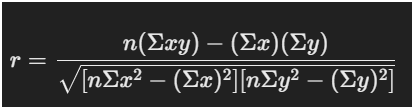

2. **Korelasi Spearman (Spearman's Rank Correlation)** :
- Digunakan ketika data tidak memenuhi asumsi normalitas atau datanya berbentuk ordinal (data berurutan).
- Korelasi Spearman mengukur seberapa baik hubungan antara dua variabel dapat digambarkan menggunakan fungsi monotonik.
3. **Korelasi Kendall (Kendall's Tau):**
- Alternatif dari Spearman, digunakan untuk data ordinal dan berfokus pada urutan data untuk mengukur hubungan antar variabel.

**Contoh Penerapan Korelasi dalam Python:**
Menggunakan korelasi Pearson antara dua variabel dalam dataset Titanic, misalnya Age dan Fare.

In [ ]:
import pandas as pd

# Menghitung korelasi Pearson antara dua variabel
correlation = data4['Age'].corr(data4['Fare'], method='pearson')
print(f"Korelasi Pearson antara Age dan Fare: {correlation}")


Interpretasi Hasil Korelasi:
Nilai positif mendekati 1 menunjukkan hubungan yang kuat dan positif antara variabel.
Nilai negatif mendekati -1 menunjukkan hubungan yang kuat dan negatif.
Nilai mendekati 0 menunjukkan hubungan yang lemah atau tidak ada hubungan.
Teknik korelasi membantu dalam analisis data untuk memahami pola hubungan antara variabel sebelum melanjutkan ke analisis yang lebih mendalam atau pembuatan model.

### **contoh hitung korelasi menggunakan pandas, dengan default adalah pearson correlation.**

buat data baru 5

1. Panggil library untuk visualisasi (buat data(5))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


2. Panggil library untuk visualisasi

In [ ]:
def titanic_corr(data4):
    # Memilih kolom numerik saja
    numeric_data4 = data4.select_dtypes(include=['float64', 'int64'])

    # Menghitung korelasi
    correlation = numeric_data4.corr()

    # Membuat heatmap untuk menampilkan korelasi
    sns.heatmap(correlation, annot=True, cbar=True, cmap='RdYlGn')
    plt.show()


3. Panggil dan jalankan fungsi tersebut.

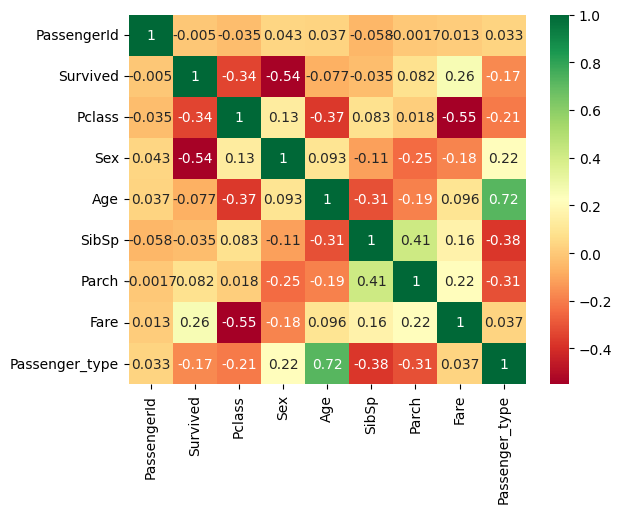

In [ ]:
titanic_corr(data4)



Jika ingin menampilkan nilai korelasi tanpa heatmap

In [ ]:
def titanic_corr_table(data):
    # Memilih kolom numerik saja
    numeric_data = data.select_dtypes(include=['float64', 'int64'])

    # Menghitung korelasi
    correlation = numeric_data.corr()

    # Menampilkan nilai korelasi dalam bentuk tabel
    return correlation


Panggil fungsi tersebut dengan :

In [ ]:
correlation_table = titanic_corr_table(data4)
print(correlation_table)


                PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId        1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived          -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass            -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex                0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age                0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp             -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch             -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare               0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   
Passenger_type     0.033334 -0.169298 -0.207880  0.215365  0.715579 -0.377843   

                   Parch      Fare  Passenger_type  
PassengerId    -0.001652  0.012658        0.033334  
Survived        0.081629  0.257307       -0.169298  
Pclass          0.018443 -0.54

> ### **Tugas 9 dan 10**

Coba hitung korelasi setelah atribut telah di-encoding.

**Tugas 9**:

Apa maksud hasil korelasi tersebut?

Korelasi mengukur hubungan linier antara dua atribut numerik. Nilai korelasi berkisar antara:

- +1: Korelasi positif sempurna — artinya, jika satu atribut meningkat, atribut lain juga akan meningkat secara proporsional.
- -1: Korelasi negatif sempurna — artinya, jika satu atribut meningkat, atribut lain akan menurun secara proporsional.
- 0: Tidak ada korelasi linier antara atribut.

Jika, setelah encoding, atribut seperti Sex_male memiliki korelasi positif yang kuat dengan Survived, artinya jenis kelamin laki-laki lebih berhubungan dengan kemungkinan bertahan hidup. Sebaliknya, jika korelasinya negatif, laki-laki cenderung lebih rendah kemungkinan bertahan hidup dibandingkan perempuan.

Silahkan hapus atribut yang tidak anda gunakan dari data anda.

**Tugas 10**:

- Jelaskan mengapa anda menghapus atribut-atribut yang tidak digunakan tersebut.
- Untuk passangerId, yang sifatnya adalah unik per instance-nya maka atribut tersebut
dihapus atau tidak?

Hapus Atribut yang Tidak Digunakan dari Data

In [ ]:
def remove_unused_columns(data):
    # Hapus kolom yang tidak digunakan, misalnya 'Name', 'Ticket', dan 'Cabin'
    data_cleaned = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

    return data_cleaned

# Contoh pemanggilan
data_cleaned = remove_unused_columns(data4)


Jelaskan mengapa anda menghapus atribut-atribut yang tidak digunakan tersebut.

 Mengapa Menghapus Atribut-atribut Tersebut?
Atribut yang tidak relevan untuk analisis atau yang tidak berkontribusi pada perhitungan statistik biasanya dihapus. Misalnya:

- **Name**: Nama penumpang adalah teks unik yang tidak memiliki relevansi statistik dalam menghitung korelasi.
- **Ticket**: Nomor tiket juga tidak berhubungan langsung dengan prediksi atau analisis bertahan hidup.
- **Cabin**: Kabin mungkin terlalu detail dan memiliki banyak nilai yang hilang (missing values), sehingga bisa diabaikan.
Dengan menghapus atribut-atribut ini, kita bisa fokus pada atribut yang benar-benar memberikan informasi yang relevan dan berguna dalam analisis.

Dengan menghapus atribut-atribut ini, kita bisa fokus pada atribut yang benar-benar memberikan informasi yang relevan dan berguna dalam analisis.

**Apakah Atribut PassengerId Dihapus?**

**PassengerId** bersifat unik untuk setiap penumpang dan tidak memiliki makna statistik untuk perhitungan korelasi atau prediksi.

Karena itu, PassengerId biasanya dihapus, kecuali Anda perlu melacak penumpang tertentu dalam dataset. Untuk analisis statistik dan korelasi, sebaiknya dihapus, karena ini hanya sekadar identifikasi yang tidak berkontribusi terhadap analisis korelasi atau prediktif.

In [ ]:
# Menghapus PassengerId karena tidak relevan untuk korelasi
data4_cleaned = data4.drop(['PassengerId'], axis=1)


cek data

In [ ]:
print(data5.isnull().sum())
print(data5.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [ ]:
data5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
